# Problem 2

The data is a subset of data from the [Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction/data). You will explore using Logistic Regression and SVM for this problem.

Data fields
- id: ad identifier
- click: 0/1 for non-click/click
- hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- C1 -- anonymized categorical variable
- banner_pos
- site_id
- site_domain
- site_category
- app_id
- app_domain
- app_category
- device_id
- device_ip
- device_model
- device_type
- device_conn_type
- C14-C21 -- anonymized categorical variables

The input variables are 'hour' up to 'C21', however, we will not use all of them.
The output variable is 'click', which is a binary variable.

Let's first read the data!

In [63]:
import pandas as pd
data = pd.read_csv('trainsubset.csv')


It is recommended to use only the first 10000 data for training the data. We will talk about the techniques to handle big data later

In [64]:
data = data.head(10000)

In [65]:
data.head(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
5,10000720757801103869,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,100077,117
6,10000724729988544911,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
7,10000918755742328737,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20632,320,50,2374,3,39,-1,23
8,10000949271186029916,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
9,10001264480619467364,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21689,320,50,2496,3,167,100191,23


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
id                  10000 non-null uint64
click               10000 non-null int64
hour                10000 non-null int64
C1                  10000 non-null int64
banner_pos          10000 non-null int64
site_id             10000 non-null object
site_domain         10000 non-null object
site_category       10000 non-null object
app_id              10000 non-null object
app_domain          10000 non-null object
app_category        10000 non-null object
device_id           10000 non-null object
device_ip           10000 non-null object
device_model        10000 non-null object
device_type         10000 non-null int64
device_conn_type    10000 non-null int64
C14                 10000 non-null int64
C15                 10000 non-null int64
C16                 10000 non-null int64
C17                 10000 non-null int64
C18                 10000 non-null int64
C19                 1

# Part 1: Training and testing split

Let's start with defining the training data matrix X and response y. 
You need to use get_dummies to create the dummy variable with these only selected columns. Please select the response y as the click rate.


In [67]:
selected_columns =['C1','site_domain','app_id','app_domain','site_category','banner_pos','device_type','device_conn_type','C14','C15','C16','C17','C18','C19']
# Please put your code here to define the data matrix X and y
X = data.loc[:,selected_columns]
y = data.click

In [68]:
Xnew= pd.get_dummies(X)
Xnew.as_matrix()

array([[1005,    0,    1, ...,    0,    0,    0],
       [1005,    0,    1, ...,    0,    0,    0],
       [1005,    0,    1, ...,    0,    0,    0],
       ..., 
       [1005,    1,    1, ...,    0,    1,    0],
       [1005,    0,    1, ...,    0,    0,    0],
       [1005,    0,    1, ...,    0,    1,    0]], dtype=int64)

In [69]:
Xnew.head()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,site_category_3e814130,site_category_50e219e0,site_category_72722551,site_category_75fa27f6,site_category_76b2941d,site_category_a818d37a,site_category_bcf865d9,site_category_c0dd3be3,site_category_f028772b,site_category_f66779e6
0,1005,0,1,2,15706,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
1,1005,0,1,0,15704,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
2,1005,0,1,0,15704,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
3,1005,0,1,0,15706,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
4,1005,1,1,0,18993,320,50,2161,0,35,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.30, random_state=50)

# Part 2.1: SVM

Let's Start with SVM. Please use svm.LinearSVC, Let's try to add balanced weight to handle the class-imbalance issue. 
 1. please compute the precision/recall, f1-score, and confusion matrix. 
 2. Please run the algorithm for multiple times and observe the result. 

             precision    recall  f1-score   support

          0       0.91      0.53      0.67      2500
          1       0.24      0.73      0.36       500

avg / total       0.80      0.56      0.62      3000

0.194496926724
[[1317 1183]
 [ 133  367]]
Normalized confusion matrix
[[ 0.5268  0.4732]
 [ 0.266   0.734 ]]


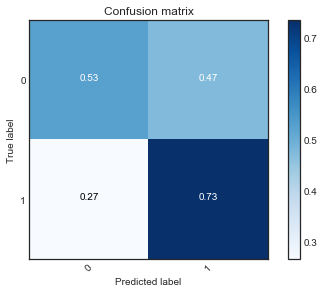

In [72]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import svm
from sklearn import preprocessing

%matplotlib inline
plt.style.use('seaborn-white')

clf = svm.LinearSVC(class_weight='balanced')
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)


clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
print(classification_report(y_test,y_pred))
print(matthews_corrcoef(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)




#### Iteration-1 Confusion Matrix

    precision    recall  f1-score   support

          0       0.92      0.52      0.66      2500
          1       0.24      0.76      0.37       500

avg / total       0.80      0.56      0.61      3000

0.208997129935

[[1300 1200]

[ 120  380]]

Normalized confusion matrix

[[ 0.52  0.48]

[ 0.24  0.76]]
 
#### Iteration-2 Confusion Matrix

    precision    recall  f1-score   support

          0       0.91      0.52      0.66      2500
          1       0.24      0.74      0.36       500

avg / total       0.80      0.56      0.61      3000

0.192798201214

[[1301 1199]

[ 131  369]]
 
Normalized confusion matrix

[[ 0.5204  0.4796]

[ 0.262   0.738 ]]
 
#### Iteration-3 Confusion Matrix 

         precision    recall  f1-score   support

          0       0.91      0.53      0.67      2500
          1       0.24      0.73      0.36       500

avg / total       0.80      0.56      0.62      3000

0.194496926724

[[1317 1183]

[ 133  367]]

Normalized confusion matrix

[[ 0.5268  0.4732]

[ 0.266   0.734 ]]

# Part 2.2 Regularized SVM

1. Let's try to add penalty, please exlpore the use of the 'l1' and'l2' penalty in Scikit-learn, Please also use cross validation to select the best tuning parameters C.
2. please compute the precision/recall, f1-score, and confusion matrix for 'l1' and 'l2' model with the best tuning paramter C.



### L1 Regularization

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Cs = [0.01,0.1,1,10,100,1000]
parameters = {'C':Cs}

svc = LinearSVC(penalty='l1', dual = False)
clf_regsvm = GridSearchCV(svc, parameters,return_train_score=True)
clf_regsvm.fit(X_train, y_train)
print('best parameters:',clf_regsvm.best_params_,',testing accuracy:',clf_regsvm.best_estimator_.score(X_test,y_test))
    
    

    


best parameters: {'C': 0.01} ,testing accuracy: 0.827666666667


In [80]:
clf_l1= svm.LinearSVC(penalty= 'l1', dual = False, class_weight = 'balanced' , C=0.01)
clf_l1.fit(X_train, y_train)
y_predl1 = clf_l1.predict(X_test)
print(classification_report(y_test,y_predl1))
print(matthews_corrcoef(y_test,y_predl1))

             precision    recall  f1-score   support

          0       0.92      0.52      0.66      2500
          1       0.24      0.77      0.37       500

avg / total       0.81      0.56      0.61      3000

0.216210742298


[[1299 1201]
 [ 115  385]]
Normalized confusion matrix
[[ 0.5196  0.4804]
 [ 0.23    0.77  ]]


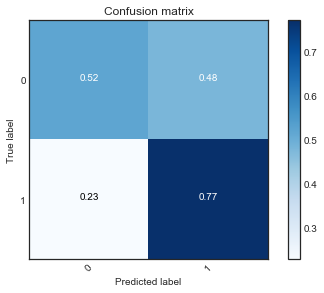

In [82]:
cm = confusion_matrix(y_test, y_predl1)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)


### L2 Regularization

In [79]:
svc2 = svm.LinearSVC(penalty='l2')
clf_l2 = GridSearchCV(svc2, parameters,return_train_score=True)
clf_l2.fit(X_train, y_train)
print('best parameters:',clf_l2.best_params_,',testing accuracy:',clf_l2.best_estimator_.score(X_test,y_test))

best parameters: {'C': 0.01} ,testing accuracy: 0.827


In [17]:
clf_l2= svm.LinearSVC(penalty= 'l2', class_weight = 'balanced' , C=0.01)
clf_l2.fit(X_train, y_train)
y_predl2 = clf_l2.predict(X_test)
print(classification_report(y_test,y_predl2))
print(matthews_corrcoef(y_test,y_predl2))

             precision    recall  f1-score   support

          0       0.84      0.98      0.90      2500
          1       0.40      0.07      0.12       500

avg / total       0.77      0.83      0.77      3000

0.106913664854


[[2435   65]
 [ 454   46]]
Normalized confusion matrix
[[ 0.974  0.026]
 [ 0.908  0.092]]


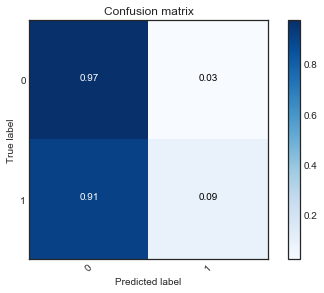

In [85]:
cm = confusion_matrix(y_test, y_predl2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)


# Part 3: Logistic Regression

Please also explore using Logistic Regression on this problem and report the result. 
1. Please plot the ROC curve and compute the area under the ROC curve. (You don't need to explore the use of penalty since the cross validation can be very slow)
2. Please plot the precision recall curve and compute the average precision
3. Please compute the F1-score and confusion matrix.

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.30, random_state=50)

[[2434   66]
 [ 454   46]]
Normalized confusion matrix
[[ 0.9736  0.0264]
 [ 0.908   0.092 ]]


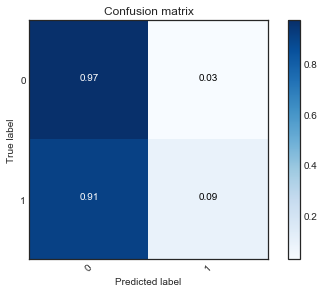

In [93]:
import sklearn.linear_model as skl_lm

clf = skl_lm.LogisticRegression(C=1e10,tol=1e-9)
# C is the inverse of regularization strength, here we don't need regularization since we have so many data
# Set it to very big 
clf.fit(X_train,y_train)
clf.coef_


from sklearn.metrics import confusion_matrix
import itertools

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)


from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.699238


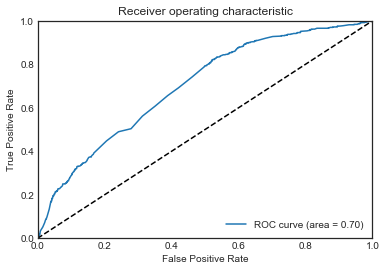

In [94]:
ROC(y_test,y_score)

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
print(classification_report(y_test,y_pred))

print(matthews_corrcoef(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90      2500
          1       0.41      0.09      0.15       500

avg / total       0.77      0.83      0.78      3000

0.12895887627


In [96]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.31


Text(0.5,1,'2-class Precision-Recall curve: AP=0.31')

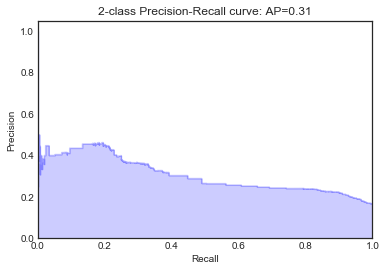

In [97]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Part 4: Random Forest

Please also explore using Random Forest on this problem and report the result. 
1. Please use cross-validation to select the best tuning parameters
2. Please plot the ROC curve and compute the area under the ROC curve. 
3. Please plot the precision recall curve and compute the average precision
4. Please compute the F1-score and confusion matrix

In [100]:
from sklearn.preprocessing import StandardScaler

# preprocess dataset, split into training and test part
XRF = StandardScaler().fit_transform(Xnew)
X_train, X_test, y_train, y_test = train_test_split(XRF, y, test_size=.4)

In [42]:
XRF

array([[-0.05429968, -0.48385389, -0.11329767, ..., -0.020004  ,
        -0.49280178, -0.04695584],
       [-0.05429968, -0.48385389, -0.11329767, ..., -0.020004  ,
        -0.49280178, -0.04695584],
       [-0.05429968, -0.48385389, -0.11329767, ..., -0.020004  ,
        -0.49280178, -0.04695584],
       ..., 
       [-0.05429968,  1.98604856, -0.11329767, ..., -0.020004  ,
         2.02921346, -0.04695584],
       [-0.05429968, -0.48385389, -0.11329767, ..., -0.020004  ,
        -0.49280178, -0.04695584],
       [-0.05429968, -0.48385389, -0.11329767, ..., -0.020004  ,
         2.02921346, -0.04695584]])

In [44]:
from sklearn.ensemble import RandomForestClassifier


max_depth=[2,4,8,16,32,64]
ntrees = [4,8,16,32]
max_features = [0.1,0.2,0.3,0.5,0.9]
parameters = {'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features}


model =  RandomForestClassifier(max_depth=10, n_estimators=100, max_features=1)
clfRF = GridSearchCV(model, parameters,return_train_score=True)
clfRF.fit(X_train, y_train)
score = clfRF.score(X_test, y_test)
clfRF.fit(X_train, y_train)
print('Accuracy:{},Best parameters:{}, feature importance:{}'.format(score,clfRF.best_params_,clfRF.best_estimator_.feature_importances_))


Accuracy:0.8195,Best parameters:{'max_depth': 16, 'max_features': 0.3, 'n_estimators': 32}, feature importance:[  2.75308421e-03   1.35566533e-02   4.11374385e-03   2.14956986e-02
   2.00693822e-01   2.46392121e-02   7.27890107e-02   9.22118194e-02
   2.79246050e-02   6.34709576e-02   0.00000000e+00   0.00000000e+00
   1.56926574e-03   0.00000000e+00   0.00000000e+00   1.89563641e-03
   1.79762665e-03   7.79643061e-05   1.49336162e-05   0.00000000e+00
   0.00000000e+00   3.49774971e-03   2.97384964e-05   0.00000000e+00
   3.36490480e-03   0.00000000e+00   1.39325740e-03   0.00000000e+00
   1.23188593e-05   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.05251609e-03   2.23656795e-05
   2.63713465e-03   1.81129767e-02   5.24460254e-05   5.83412861e-03
   0.00000000e+00   1.32376005e-04   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   2.35629893e-04   0.00000000e+00   0.00000

In [104]:
clfRF = RandomForestClassifier(max_depth=16, n_estimators=32, max_features=.3)
clfRF.fit(X_train, y_train)
y_pred= clfRF.predict(X_test)

[[3230  104]
 [ 591   75]]
Normalized confusion matrix
[[ 0.96880624  0.03119376]
 [ 0.88738739  0.11261261]]


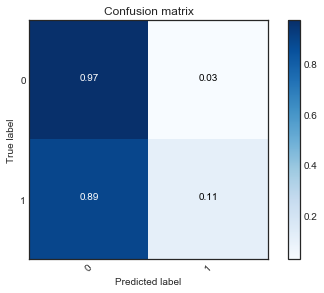

In [105]:
y_predRF = clfRF.predict(X_test)
cm = confusion_matrix(y_test, y_predRF)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)


from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.686444


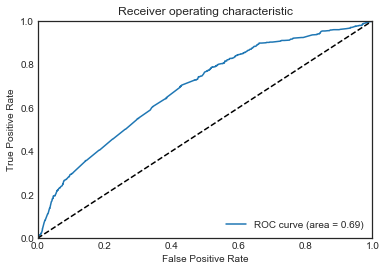

In [106]:
y_scoreRF = clfRF.predict_proba(X_test)[:,1]
ROC(y_test,y_scoreRF)

In [107]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
print(classification_report(y_test,y_predRF))

print(matthews_corrcoef(y_test,y_predRF))

             precision    recall  f1-score   support

          0       0.85      0.97      0.90      3334
          1       0.42      0.11      0.18       666

avg / total       0.77      0.83      0.78      4000

0.146699910598


In [108]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_scoreRF)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.30


Text(0.5,1,'2-class Precision-Recall curve: AP=0.30')

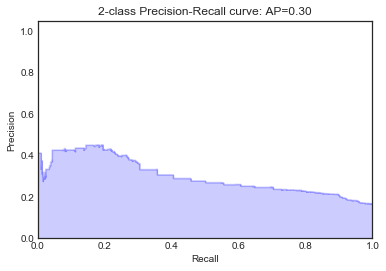

In [109]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_scoreRF)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Part 5: Gradient Boosting Tree
Please try to implement the xgboost library to this dataset. 
1. Please use cross-validation to select the best tuning parameters
2. Please plot the ROC curve and compute the area under the ROC curve. 
3. Please plot the precision recall curve and compute the average precision
4. Please compute the F1-score and confusion matrix

In [20]:
!pip install xgboost

In [98]:
from xgboost import XGBClassifier


In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)

param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch1.fit(X_train, y_train)
score = gsearch1.score(X_test, y_test)
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140,max_depth=gsearch1.best_params_['max_depth'], min_child_weight=gsearch1.best_params_['min_child_weight'], gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),  param_grid = param_test3, scoring='accuracy',n_jobs=4, cv=5)
gsearch2.fit(X_train, y_train)
score = gsearch2.score(X_test, y_test)    
print('Accuracy:{}, feature importance:{}'.format(score,gsearch2.best_estimator_.feature_importances_))

In [110]:
print(' Best Tuning Parameters')
print(gsearch1.best_params_)

 Best Tuning Parameters
{'max_depth': 5, 'min_child_weight': 1}


In [111]:
print(' Best Tuning Parameters')
print(gsearch2.best_params_)

 Best Tuning Parameters
{'gamma': 0.4}


In [118]:
XGB = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, 
                    min_child_weight=1, gamma=0.4, subsample=0.8, 
                    colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

[[3266   68]
 [ 608   58]]
Normalized confusion matrix
[[ 0.97960408  0.02039592]
 [ 0.91291291  0.08708709]]


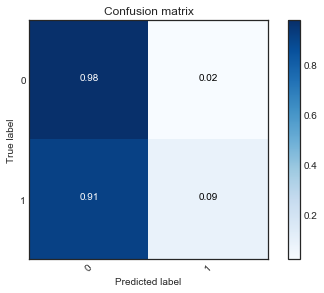

In [120]:
XGB.fit(X_train, y_train)
y_predXGB = XGB.predict(X_test)
cm = confusion_matrix(y_test, y_predXGB)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm,[0,1],normalize=True)


from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.693287


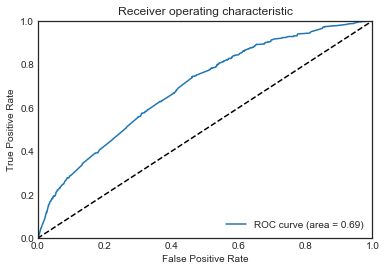

In [121]:
y_scoreXGB = XGB.predict_proba(X_test)[:,1]
ROC(y_test,y_scoreXGB)

In [122]:
print(classification_report(y_test,y_predXGB))

print(matthews_corrcoef(y_test,y_predXGB))

             precision    recall  f1-score   support

          0       0.84      0.98      0.91      3334
          1       0.46      0.09      0.15       666

avg / total       0.78      0.83      0.78      4000

0.142240458602


In [123]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_scoreXGB)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.31


Text(0.5,1,'2-class Precision-Recall curve: AP=0.31')

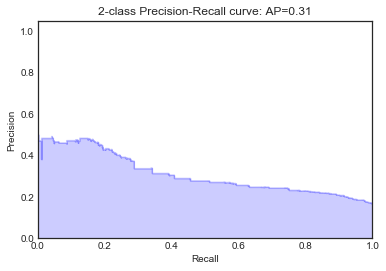

In [124]:
precision, recall, _ = precision_recall_curve(y_test, y_scoreXGB)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))